<a href="https://colab.research.google.com/github/Abdourahim445/FDSFE_Asylla/blob/main/Asylla_ClassDemo3_LineFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/walkingspeed_Bettencourt07.csv",header=None,names=["Population","Wspeed","City"])

In [2]:
df

,Population,Wspeed,City
0,2520.0,2.28,Itea
1,370.0,2.79,Psychro
2,5650.0,3.37,Netanya
3,14100.0,3.76,Corte
4,23300.0,3.31,Safed
5,52600.0,4.91,Dimona
6,73300.0,4.40,Netanya
7,77100.0,3.90,New Haven
8,145000.0,4.40,Jerusalem
9,320000.0,4.49,Brno


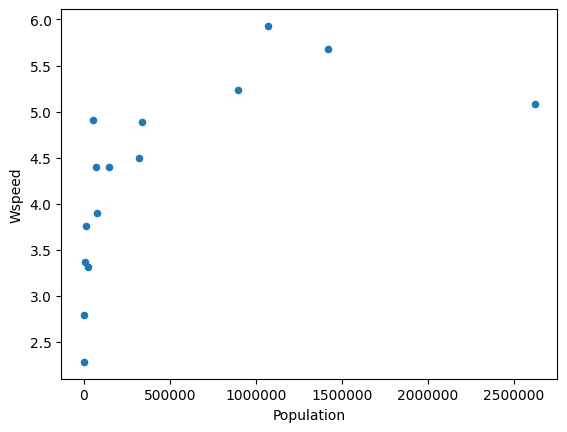

In [3]:
ax = df.plot("Population","Wspeed",kind="scatter")
ax.ticklabel_format(style="plain")

In [4]:
import numpy as np
df["Population"] = np.log10(df["Population"])

Text(0.5, 0, 'log10(Population)')

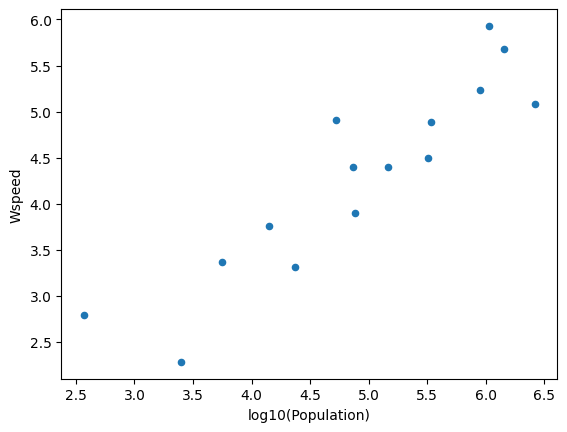

In [5]:
ax = df.plot("Population","Wspeed",kind="scatter")
ax.set_xlabel("log10(Population)")

Text(0.5, 0, 'log10(Population)')

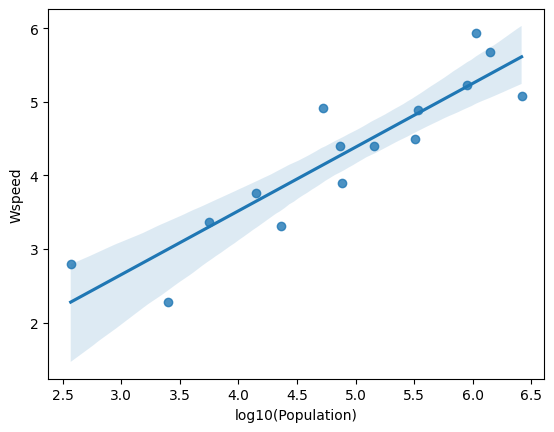

In [6]:
import seaborn as sns
ax = sns.regplot(x=df["Population"],y=df["Wspeed"])
ax.set_xlabel("log10(Population)")

In [7]:
def line(x, slope, intercept):
  y = slope * x + intercept
  return y

def SSE(y, ypred):
  return((y - ypred)**2).sum()

In [8]:
current_min_sse = 1e7

for slope in np.arange(0, 3, 0.01):
  for intercept in np.arange(0, 3, 0.01):
    prediction = line(df["Population"], slope, intercept)
    sse = SSE(df["Wspeed"], prediction)

    if sse < current_min_sse:
      current_min_sse = sse
      manual_slope = slope
      manual_intercept = intercept

print(f"Best Slope: {manual_slope:.2f}")
print(f"Best Intercept: {manual_intercept:2f}")

Best Slope: 0.87
Best Intercept: 0.030000


In [9]:
df["prediction_manual"] = line(df["Population"], manual_slope, manual_intercept)

In [10]:
manual_min_sse = SSE(df["Wspeed"], df["prediction_manual"])
print(f"Minimum Sum of Squared Errors Achieved: {manual_min_sse:.2f}")

Minimum Sum of Squared Errors Achieved: 2.76


Text(0, 0.5, 'Walking Speed (ft/s)')

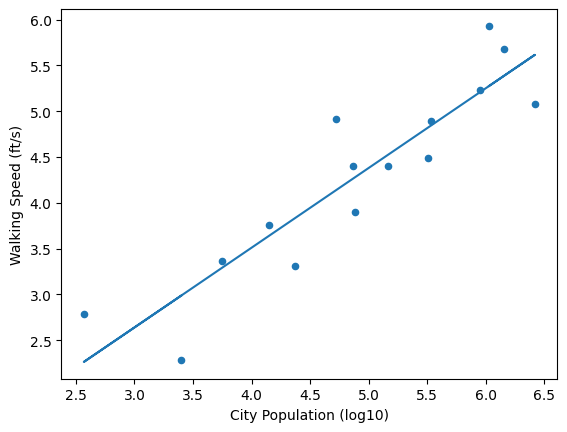

In [11]:
ax = df.plot("Population","Wspeed",kind="scatter")
ax.plot(df["Population"], df["prediction_manual"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")

In [12]:
numpy_slope, numpy_intercept = np.polyfit(df["Population"],df["Wspeed"],1)

print(f"NumPy Slope: {numpy_slope:.3f}")
print(f"NumPy Intercept: {numpy_intercept:.3f}")

NumPy Slope: 0.865
NumPy Intercept: 0.057


Text(0, 0.5, 'Walking Speed (ft/s)')

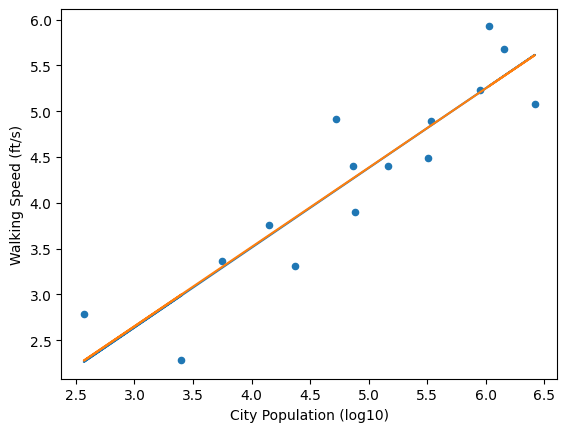

In [13]:
df["prediction_numpy"] = line(df["Population"], numpy_slope, numpy_intercept)

ax = df.plot("Population","Wspeed",kind="scatter")
ax.plot(df["Population"], df["prediction_manual"])
ax.plot(df["Population"], df["prediction_numpy"])

ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression().fit(df["Population"].values.reshape(-1,1), df["Wspeed"].values)

In [16]:
score = reg.score(df["Population"].values.reshape(-1,1), df["Wspeed"].values)
print(f"Scoe of linear regression from sklearn: {score:.3f}")

Scoe of linear regression from sklearn: 0.822


In [17]:
df["prediction_sklearn"] = reg.predict(df["Population"].values.reshape(-1,1))

Text(0, 0.5, 'Walking Speed (ft/s)')

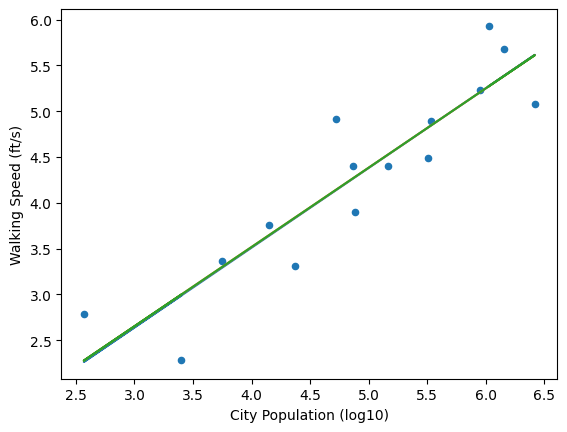

In [18]:
ax = df.plot("Population", "Wspeed", kind="scatter")
ax.plot(df["Population"], df["prediction_manual"])
ax.plot(df["Population"], df["prediction_numpy"])
ax.plot(df["Population"], df["prediction_sklearn"])

ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")